## 라이브러리 설정

In [ ]:
import tensorflow as tf
import os
import glob
import pandas as pd
import numpy as np
import PIL.Image as Image

## 함수

### JSON에서 필요한 정보를 반환하는 함수

In [ ]:
def get_data(json_data):
    name = json_data['categories'][0]['name']
    # Type1 = json_data['categories'][0]['metainfo']['Type1']
    Type2 = json_data['categories'][0]['metainfo']['Type2']
    file_name = json_data['images'][0]['file_name']
    width = json_data['images'][0]['width']
    height = json_data['images'][0]['height']
    
    # return (width, height), name, Type1, Type2, file_name
    return (width, height), name, Type2, file_name


### Type2와 Name으로 Label을 선언해주는 함수

In [ ]:
# def get_label(Type2):
#     non_structure_list = ['기념비', '기념탑', '나무', '동상', '비석', '석상', '석탑', '성지', '전망대', '조망대', '천연기념물', '문화재', '비지정향토문화재']
#     modern_list = ['갤러리', '과학관', '교회', '기념관','미술관','박물관','복합문화공간','성당','수도원','역사관','전시관','체험','체험공간','체험관','테마공원','테마파크','천문대']
#     if Type2 in modern_list:
#         return 1
#     else:
#         return 0

## Image Resize

In [ ]:
import ujson as json
import cv2

Type2_landmark_set_list = dict()
Rate_list = []
Length_list = dict()

folder_path = '/home/aiffel/Mini_AIFFELTHON/data/'
# folder_path = '/home/aiffel/Mini_AIFFELTHON/data/Training/세종특별자치시/'
# folder_path = '/home/aiffel/Mini_AIFFELTHON/보관/병산사/'


json_list = glob.glob(folder_path + '**/**/**/*.json')
# json_list = glob.glob(folder_path + '**/*.json')
image_list = glob.glob(folder_path + '*.JPG')


# print(len(json_list))
# print(len(image_list))
# print(image_list)

resize_height = 192
resize_width = 256

for image_path in image_list:
    image = cv2.imread(image_path)
    # print(image.shape)
    ## (4032,3024)
    resize_image = cv2.resize(image, (resize_width, resize_height))
    cv2.imwrite(image_path, resize_image)
    
for json_file in json_list:
    with open(json_file, 'r') as file:
        json_data = json.load(file)
        (width, height), name, Type2, file_name = get_data(json_data)
        
        if height == 0:
            height = 1
        rate = width/height
        
        if (width, height, rate) not in Length_list:
            Length_list[(width, height, rate)] = 1
        else :
            Length_list[(width, height, rate)] += 1

## CSV 기록

In [ ]:
import csv

## 길이 비율
# Length_list
sorted_Length_list = sorted(Length_list.items(), key = lambda item: item[1], reverse = True)
sorted_Length_list

with open('/home/aiffel/Mini_AIFFELTHON/landmark_Length.csv','w',newline='') as file_4:
    writer_4 = csv.writer(file_4)
    for (width, height, rate), count in sorted_Length_list:
        writer_4.writerow([width, height, rate, count])

## 시각화

In [ ]:
# 4대3 400x300
count1 = 0
# 16대9 480x270
count2 = 0
# 3대2 420 x 280
count3 = 0
# 1대1 350 x 350
count4 = 0
# 3대4 270 x 360
count5 = 0
# 
for (width, height, rate), count in sorted_Length_list:
    if rate > 1.33 and rate < 1.35:
        count1 += count
    if rate >1.77 and rate < 1.8:
        count2 += count
    if rate > 1.49 and rate < 1.51:
        count3 += count
    if rate > 0.99 and rate < 1.01:
        count4 += count
    if rate > 0.74 and rate < 0.76:
        count5 += count
        

print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

print(count1 + count2 + count3 + count4 + count5)


2255332
1879753
36263
8274
26697
4206319


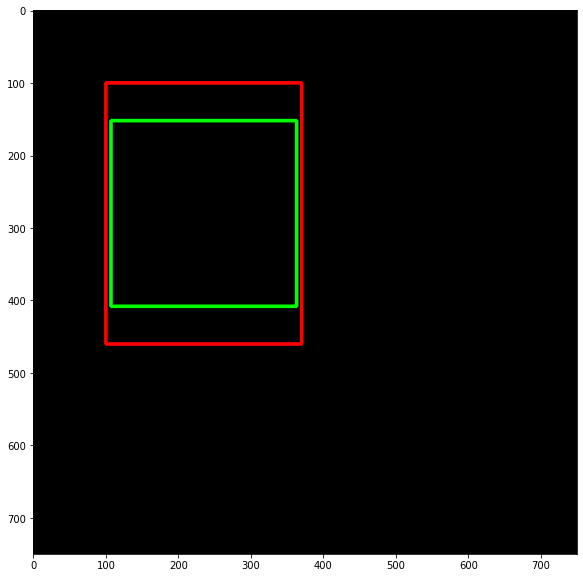

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 256x256
start= 100
width = 270
height = 360
box = 256

img = np.zeros((750,750,3),np.uint8)
img = cv2.rectangle(img, (start,start), (start+width, start+height), (255,0,0),3 )
img = cv2.rectangle(img, (int(start+ width/2 - box/2), int(start + height/2 - box/2)), (int(start+ width/2 +box/2), int(start + height/2 + box/2)), (0,255,0),3 )


plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()